In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *

/home/hugo/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/hugo/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    gram = tx.T.dot(tx)
    graminv = np.linalg.inv(gram)
    wopt = graminv.dot(tx.T).dot(y)
    return wopt

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    ls_w = least_squares(y, tx)
    ls_err = compute_loss(y, tx, ls_w, "MSE")
    w0, w1 = generate_w(50)
    grid_losses = grid_search(y, tx, w0, w1, "MSE")
    grid_err, grid_w0, grid_w1 = get_best_parameters(w0, w1, grid_losses)
    print("Least Squares:")
    print("Loss = ",ls_err, ", w = ", ls_w)
    print("Grid Search:")
    print("Loss = ",grid_err, ", w = ", [grid_w0, grid_w1])

test_your_least_squares()

Least Squares:
Loss =  15.3858878688 , w =  [ 73.293922    13.47971243]
Grid Search:
Loss =  18.7935410195 , w =  [71.428571428571416, 15.306122448979579]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
"""def build_poly(x, degree):
    polynomial basis functions for input data x, for j=0 up to j=degree.
    resarray = [x ** d for d in range(degree+1)]
    print("fuckayou")
    return np.array(resarray).T"""

print(build_poly(np.array([1, 2, 3]), 3).shape)

(3, 4)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.24965870360912137
Processing 4th experiment, degree=12, rmse=0.2557620172413158


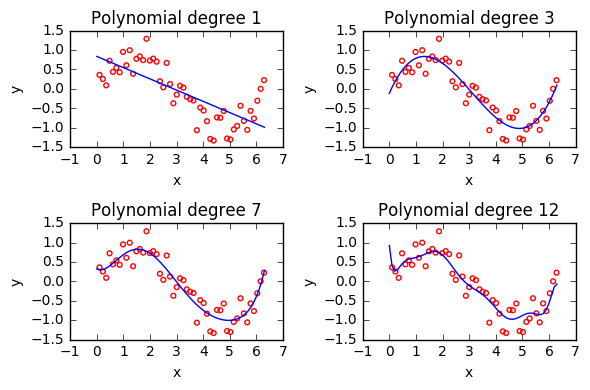

In [6]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        polyx = build_poly(x, degree)
        weight = least_squares(y, polyx)
        rmse = compute_loss(y, polyx, weight, "RMSE")

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [7]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    #print(x.shape, y.shape)
    N = x.shape[0]
    ksplit = np.round(N * ratio)
    data = np.vstack((x, y)).T
    np.random.shuffle(data)
    traindata, valdata = data[:ksplit, :], data[ksplit:, :]
    return traindata[:, 0], traindata[:, 1], valdata[:, 0], valdata[:, 1]

    
    """
    Following implentation is only if x is a matrix, not a vector
    d = x.shape[1]
    data = np.zeros((N, d+1))
    #print(data.shape)
    data[:, :-1] = x
    #print(data[:, -1])
    data[:, -1] = y
    #print(data)
    ksplit = np.round(N * ratio)
    #print(ksplit)
    np.random.shuffle(data)
    #print(data)
    traindata, valdata = data[:ksplit, :], data[ksplit:, :]
    #print(traindata, valdata)
    return traindata[:, :-1], traindata[:, -1], valdata[:, :-1], valdata[:, -1]"""

testx = np.array([1, 2, 3, 4])
testy = np.array([1, 4, 9, 16])
print(testx.shape, testy.shape)
split_data(testx, testy, 0.5)

(4,) (4,)


/home/hugo/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([4, 3]), array([16,  9]), array([1, 2]), array([1, 4]))

Then, test your `split_data` function below.

In [8]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    trainx, trainy, testx, testy = split_data(x, y, ratio, seed)
    #print(trainx.shape, trainy.shape, testx.shape, testy.shape)
    polytrainx = build_poly(trainx, degree)
    polytestx = build_poly(testx, degree)
    w = least_squares(trainy, polytrainx)
    rmse_tr = compute_loss(trainy, polytrainx, w, "RMSE")
    rmse_te = compute_loss(testy, polytestx, w, "RMSE")
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
    print("w = ",w)

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
w =  [ 0.84783537 -0.2911729 ]
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
w =  [-0.11484891  1.62290304 -0.78241693  0.08421057]
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
w =  [  2.90048960e-01  -1.05929035e-01   9.64263139e-01  -4.96412985e-01
  -1.48202747e-03   3.86217968e-02  -7.50622566e-03   4.43940131e-04]
proportion=0.9, degree=12, Training RMSE=1.153, Testing RMSE=1.111
w =  [ -3.07932353e+00  -6.19176847e+00   4.27678827e+01  -8.44677020e+01
   8.98258826e+01  -5.69198851e+01   2.21930531e+01  -5.24571510e+00
   6.71185449e-01  -2.03390905e-02  -6.13726115e-03   8.09387046e-04
  -3.16724680e-05]
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
w =  [ 1.03748962 -0.36688017]
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
w =  [-0.0257013   1.60705407 -0.78955651  0.08495743]
proportion=0.5, degree=7, Training RMSE=0.232, Testing R

/home/hugo/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [146]:
def compute_gradient(y, tx, w, lossf = "MSE"):
    c = -1 / len(y)
    e = y - tx.dot(w)
    if (lossf == "MSE"):
        return c * tx.T.dot(e)
    elif (lossf == "MAE"):
        return c * tx.T.dot(np.sign(e))
    else:
        raise ValueError
        
def compute_ridge_gradient(y, tx, w, lamb):
    mse = compute_gradient(y, tx, w, "MSE")
    added_term = 2 * lamb * w
    return mse + added_term

def compute_ridge_loss(y, tx, w, lamb):
    mse = compute_loss(y, tx, w, "MSE")
    added_term = lamb * sum(w ** 2)
    #print("ridge proportion = ", added_term / (mse + added_term))
    return mse + added_term
    

def ridge_regression(y, tx, lamb, initial_w, max_iters, gamma):
    """implement ridge regression."""
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_ridge_gradient(y, tx, w, lamb)
        #print(gradient)
        loss = compute_ridge_loss(y, tx, w, lamb)
        wnext = w - gamma * gradient
        nextloss = compute_ridge_loss(y, tx, wnext, lamb)
        #print("loss = ",loss, ", nextloss = ",nextloss, " for wnext = ",wnext)
        
        if (nextloss <= loss):
            w = wnext
        else:
            gamma = gamma / 10
            print("gamma reduced to ",gamma)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
         #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return loss, w

degree = 2
lamb = 0
polyx = build_poly(x, degree)
init_w = np.zeros(degree+1)
gamma = 1
max_iter = 1000
print(ridge_regression(y, polyx, lamb, init_w, max_iter, gamma))

gamma reduced to  0.1
gamma reduced to  0.01
gamma reduced to  0.001
(0.14733239886777785, array([ 0.14450672,  0.07111013, -0.04189532]))


/home/hugo/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[  1.00000000e-05   4.64158883e-04   2.15443469e-02   1.00000000e+00]
[(0.16290910530030386, array([ -5.76582059e-09,  -6.56048131e-08,  -3.39529333e-07,
        -1.52371334e-06,  -6.26073961e-06,  -2.27715683e-05,
        -6.18898422e-05,   8.72861376e-06])), (0.16290910530232883, array([ -5.76582059e-09,  -6.56048131e-08,  -3.39529333e-07,
        -1.52371334e-06,  -6.26073961e-06,  -2.27715683e-05,
        -6.18898422e-05,   8.72861376e-06])), (0.162909105396319, array([ -5.76582059e-09,  -6.56048131e-08,  -3.39529333e-07,
        -1.52371334e-06,  -6.26073961e-06,  -2.27715683e-05,
        -6.18898422e-05,   8.72861376e-06])), (0.1629091097589567, array([ -5.76582059e-09,  -6.56048131e-08,  -3.39529333e-07,
        -1.52371334e-06,  -6.26073961e-06,  -2.27715683e-05,
        -6.18898422e-05,   8.72861376e-06]))]


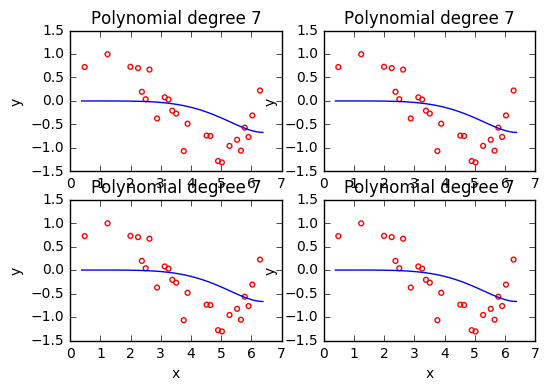

In [93]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 4)
    trainx, trainy, testx, testy = split_data(x, y, ratio, seed)
    polytrainx = build_poly(trainx, degree)
    polytestx = build_poly(testx, degree)
    initial_w = np.zeros(degree + 1)
    max_iters = 1000
    gamma = 1
    res = [ridge_regression(trainy, polytrainx, lamb, initial_w, max_iters, gamma) for lamb in lambdas]
    print(res)
    trainerrs, ws = zip(*res)
    testerrs = [compute_ridge_loss(testy, polytestx, w, lamb) for (w, lamb) in zip(ws, lambdas)]
    
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    for ind, w in enumerate(ws):
        plot_fitted_curve(trainy, trainx, w, degree, axs[ind // num_col][ind % num_col])
    #plt.tight_layout()
    #plt.savefig("visualize_polynomial_regression")
    plt.show()
    #plot_train_test(trainerrs, testerrs, lambdas, degree)
    
    
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)